# Individual Assignment
## Topic: Political Reviews 
[Assignment Detail](https://classroom.google.com/u/1/c/MjcxMjM5ODc3OTZa/a/NTEyMTA1ODAyNTRa/details)

Name: **Hoo Yee Torng** </br>
Matrix: **P101447**

## Part 1 - DATA PREPARATION

### 1.1 Download the dataset
The dataset for Political reveiws are hosted on google drive. Run the code below will automatically download the file to this Colab workspace
* [politic_issues_negative_reviews.csv](https://drive.google.com/u/1/uc?id=19BnkknbJUT9Z5FKAYNc6xmi8rObWLmbc&export=download)
* [politic_issues_positive_reviews.csv](https://drive.google.com/u/1/uc?id=12vZaqOiEAtVWdqmHeL8E35_LjBBDOmzf&export=download)



In [0]:
import requests

def download_dataset(url, filename):
  r = requests.get(url)
  with open(filename, 'wb') as f:
    f.write(r.content)

# DOWNLOAD NEGATIVE REVIEW FILE
url = 'https://drive.google.com/u/1/uc?id=19BnkknbJUT9Z5FKAYNc6xmi8rObWLmbc&export=download'
neg_filename='politic_issues_negative_reviews.csv'
download_dataset(url, neg_filename)

# DOWNLOAD POSITIVE REVIEW FILE
url = 'https://drive.google.com/u/1/uc?id=12vZaqOiEAtVWdqmHeL8E35_LjBBDOmzf&export=download'
pos_filename='politic_issues_positive_reviews.csv'
download_dataset(url, pos_filename)


### 1.2 Convert to Pandas Dataframe
Read the downloaded file and load it to Pandas dataframe. Assign Label to the dataframe where **0 : Negative Reviews** and **1 : Postive Reviews**. Then combined two dataframes into 1 master dataframe as **raw_df**

In [2]:
import pandas as pd

# READ FROM NEGATIVE REVIEW AND ASSIGN 0 AS CLASS VALUE
negative_df = pd.read_csv(neg_filename)
negative_df["label"] = 0

# READ FROM POSITIVE REVIEW AND ASSIGN 1 AS CLASS VALUE
positive_df = pd.read_csv(pos_filename)
positive_df["label"] = 1

# APPEND BOTH DATAFRAME AS 1
raw_df = positive_df.append(negative_df) 

# RENAME COLUMN
raw_df = raw_df.rename(columns={"Google Translate": "review"})
print(raw_df.shape)

raw_df.index = range(100)
raw_df['review'].apply(lambda x: len(x.split(' '))).sum()

raw_df.head

(100, 2)


<bound method NDFrame.head of                                                review  label
0   It was sarcasm or cynicism .. read it up and c...      1
1   Most pengomen here do not understand the meani...      1
2   Can not afford a tank does not mean that can n...      1
3   X THE GREAT ... but the sentiment is blocked b...      1
4   Take It kata2 X is a rod move towards progress...      1
..                                                ...    ...
95  It Stupid Malays, the mean Tun, Tun Pun And St...      0
96  you too stupid actually, you're just the same ...      0
97  The government is not bekualiti results from p...      0
98  not trying to bring down their own people, as ...      0
99  natives are not quality, if scopes on governme...      0

[100 rows x 2 columns]>

### 1.3 Process and Cleaning
This section is to do data processing and cleaning on the reivew. Steps are shows below

* extract_word - Return only alphabert
* clean_word - Remove Special Character like http etc
* remove_stopword - remove the stopword by using ntlk librray

Create a new dataframe **df**



In [3]:
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def extract_words(setence):
  text = re.sub("[^a-zA-Z]", " ", setence)
  return(text.lower())

def clean_word(sentence):
  text = re.sub(r'\|\|\|', r' ', sentence) 
  text = re.sub(r'http\S+', r'<URL>', text)
  text = text.replace('x', '')
  return text

def remove_stopword(sentence):
    new_line = []
    word_tokens = nltk.word_tokenize(sentence)
    for w in word_tokens:
      if w not in stop_words:
        new_line.append(w)
    
    return (" ".join(new_line) + " ").strip()

def get_adjective_word(setence):
  words = []
  pos_spacy = ['ADJ', 'ADV']
  pos_nltk = ['JJ','JJR', 'JJS','RB','RBS','RBR']

  ## CHECK BY SPACY FIRST
  spacy_words = nlp(u''+setence+'')
  for token in spacy_words:
    if token.pos_ in pos_spacy:
      words.append(token.text)

  ## CHECK BY NLTK
  nltk_words = nltk.word_tokenize(setence)
  for stc in nltk_words:
    nltk_token = nltk.pos_tag(nltk.word_tokenize(stc))
    if nltk_token[0][1] in pos_nltk and nltk_token[0][0] not in words:
      #print("NTLK : {}:{}".format(nltk_token[0][0], nltk_token[0][1]))
      words.append(nltk_token[0][0])
    
  return (" ".join(words) + " ").strip()

def text_processing(objdf):
  for index, row in objdf.iterrows():
    selected_review = row['review'].strip()
    selected_review = extract_words(selected_review)
    selected_review = clean_word(selected_review)
    selected_review = remove_stopword(selected_review)
    #selected_review = get_adjective_word(selected_review)
    objdf.loc[index, "review"] = selected_review 
  return objdf

df = text_processing(raw_df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


----------------------------------------------
-- POSTIVE_REVIEW
----------------------------------------------


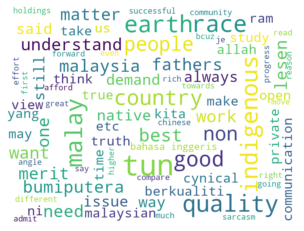

<Figure size 43200x108000 with 0 Axes>

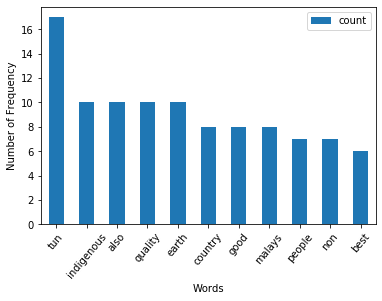

----------------------------------------------
-- NEGATIVE_REVIEW
----------------------------------------------


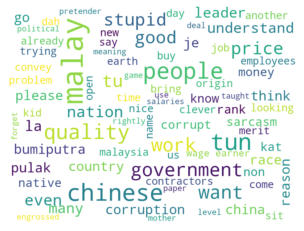

<Figure size 43200x108000 with 0 Axes>

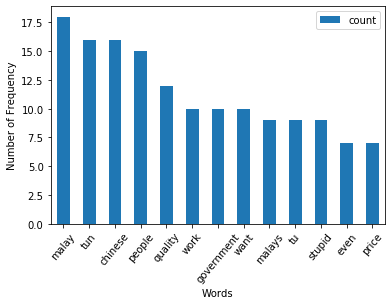

In [4]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np

def create_wordcloud(label_type, text):
  wordcloud = WordCloud(background_color="white", max_words=80, max_font_size=80, width=800, height=600).generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.savefig("{}_wordcloud.png".format(label_type))
  plt.show()

def create_word_frequency(label_type, text, min_count):
  wordlist = text.split()
  wordfreq = []
  for w in wordlist:
    word=[w, wordlist.count(w)]
    if word not in wordfreq and wordlist.count(w) > min_count:
      wordfreq.append(word)

  this_df = pd.DataFrame(wordfreq)
  this_df = this_df.rename(columns={0: "word", 1:"count"})
  this_df = this_df.sort_values(by='count', ascending=False)

  plt.figure(figsize=(600,1500))
  this_df.plot.bar(x='word', y='count', rot=0)
  plt.xticks(rotation=50)
  plt.xlabel("Words")
  plt.ylabel("Number of Frequency")
  plt.savefig("{}_wordfreq.png".format(label_type))
  plt.show()


def visualize_review(label_type, obj, min_count):
  print("----------------------------------------------")
  print("-- {}".format(label_type.upper()))
  print("----------------------------------------------")

  text = ' '.join(obj)

  # GENERATE WORDCLOUD
  create_wordcloud(label_type, text)
  create_word_frequency(label_type, text, min_count)

# EXTRACT THE SENTENCE FROM REVIEW
pos_review_list = []
neg_review_list = []
for index, row in df.iterrows():
  if df["label"][index] == 1:
    pos_review_list.append(df["review"][index])
  else:
    neg_review_list.append(df["review"][index])

visualize_review("postive_review", pos_review_list, 5)
visualize_review("negative_review", neg_review_list, 6)

##️️ 🙋🏼‍♂️️ Discussion
From the words frequency diagram above. Noticed that some words (e.g. "tun", "quality") are appeaing on both positive and negative in large number of time.

## Part 2: ML-SA approach: (15 points)

Classify the review into POSITIVE or NEGATIVE:

* Use all the features in DAY-5 lab (BOW, TF-IDF and doc2vec) on 3 types of classifiers: NB, SVM and LR 
* Report the F1-score, Recall and Precision and accuracy for all the features on the all the classifiers.
* What is the best classifier model for this review sentiment classification?


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [0]:
def show_percentage(x):
  return "{0:.2f}%".format(round(x, 2) * 100)

def run_ML(feature_name, xtrain, ytrain, xtest, ytest):
  print("-----------------------------------------------------------------------------")
  print("- " + feature_name)
  print("-----------------------------------------------------------------------------")

  if feature_name == "Doc2Vec":
    clf_dict = {
      'GaussianNB': GaussianNB(),
      'SVN': svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=2000, decision_function_shape='ovr', random_state=2),
      'LinearSVC': LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=30000)
    }    
  else:
    clf_dict = {
      'MultinomialNB': MultinomialNB(),
      'SVN': svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=2000, decision_function_shape='ovr', random_state=2),
      'LinearSVC': LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=30000)
    }

  for name, clf in clf_dict.items():
    clf.fit(xtrain, ytrain) 
    pred = clf.predict(xtest)
    print("-- " + name)
    print('Testing accuracy: {}'.format(show_percentage(accuracy_score(ytest, pred))))
    print('Testing F1 score: {}'.format(show_percentage(f1_score(ytest, pred, average='macro'))))
    print('Testing Precision score: {}'.format(show_percentage(precision_score(ytest, pred, average='macro'))))
    print('Testing Recall score: {} \n'.format(show_percentage(recall_score(ytest, pred, average='macro'))))    

In [7]:
features = df['review'].values
classes = df['label'].values

sentences_train, sentences_test, yy_train, yy_test = train_test_split(features, classes, test_size=0.1, random_state=42, shuffle=True)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(sentences_train.shape[0]))
print('Number of rows in the test set: {}'.format(sentences_test.shape[0]))

Number of rows in the total set: 100
Number of rows in the training set: 90
Number of rows in the test set: 10


### 2.1: Bag-Of-Words

In [8]:
BOW = CountVectorizer()
BOW.fit(sentences_train)
XX_train = BOW.transform(sentences_train)
XX_test  = BOW.transform(sentences_test)
run_ML("BOW", XX_train, yy_train, XX_test, yy_test)

-----------------------------------------------------------------------------
- BOW
-----------------------------------------------------------------------------
-- MultinomialNB
Testing accuracy: 60.00%
Testing F1 score: 58.00%
Testing Precision score: 75.00%
Testing Recall score: 67.00% 

-- SVN
Testing accuracy: 40.00%
Testing F1 score: 29.00%
Testing Precision score: 20.00%
Testing Recall score: 50.00% 

-- LinearSVC
Testing accuracy: 70.00%
Testing F1 score: 70.00%
Testing Precision score: 79.00%
Testing Recall score: 75.00% 



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 2.2: TD-IDF

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF = TfidfVectorizer()
TFIDF.fit_transform(sentences_train)
XXX_train = TFIDF.transform(sentences_train)
XXX_test  = TFIDF.transform(sentences_test)

run_ML("TF-IDF", XXX_train, yy_train, XXX_test, yy_test)

-----------------------------------------------------------------------------
- TF-IDF
-----------------------------------------------------------------------------
-- MultinomialNB
Testing accuracy: 50.00%
Testing F1 score: 45.00%
Testing Precision score: 72.00%
Testing Recall score: 58.00% 

-- SVN
Testing accuracy: 40.00%
Testing F1 score: 29.00%
Testing Precision score: 20.00%
Testing Recall score: 50.00% 

-- LinearSVC
Testing accuracy: 70.00%
Testing F1 score: 70.00%
Testing Precision score: 79.00%
Testing Recall score: 75.00% 



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 2.3 Doc2Vec

In [10]:
import multiprocessing
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
cores = multiprocessing.cpu_count()
from tqdm import tqdm
from sklearn import utils
import time

def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

# SPLIT TO 9:1
doc2vec_train, doc2vec_test = train_test_split(df, test_size=0.1, random_state=2, shuffle=True)

# CONVERT TO DOC TO VEC FORMAT
train_tagged = doc2vec_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['review']), tags=[r.label]), axis=1)
test_tagged = doc2vec_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['review']), tags=[r.label]), axis=1)

model_dbow = Doc2Vec(dm=0, vector_size=100, negative=5, hs=1, min_count=2, sample=0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 90/90 [00:00<00:00, 40175.33it/s]


In [13]:
%%time
for epoch in range(100):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=100)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

100%|██████████| 90/90 [00:00<00:00, 24784.15it/s]


CPU times: user 40.5 s, sys: 2.87 s, total: 43.4 s
Wall time: 46.5 s


In [14]:
run_ML("Doc2Vec", X_train, y_train, X_test, y_test)

-----------------------------------------------------------------------------
- Doc2Vec
-----------------------------------------------------------------------------
-- GaussianNB
Testing accuracy: 70.00%
Testing F1 score: 41.00%
Testing Precision score: 39.00%
Testing Recall score: 44.00% 

-- SVN
Testing accuracy: 50.00%
Testing F1 score: 49.00%
Testing Precision score: 64.00%
Testing Recall score: 69.00% 

-- LinearSVC
Testing accuracy: 70.00%
Testing F1 score: 60.00%
Testing Precision score: 60.00%
Testing Recall score: 62.00% 



##️️ 🙋🏼‍♂️️ 2.4 Machine Learning Sentiment Analysis Approach

Following are the sentiment performance results by using BOW, TD-IDF and DOC2Vev on 3 different Machine Leanring techniques. 

#### BOW

| Classifier | Accuracy | F1 | Precision | Recall | 
| ------------- | ------------- | ------------- | ------------- | ------------- |
| Multinomial NB | 60.00% | 58.00% | 75.00% | 67.00% |
| SVN | 40.00% | 29.00% | 20.00% | 50.00% |
| Linear | 70.00% | 70.00% | 79.00% | 75.00% |

#### TF-IDF

| Classifier | Accuracy | F1 | Precision | Recall | 
| ------------- | ------------- | ------------- | ------------- | ------------- |
| Multinomial NB | 50.00% | 45.00% | 72.00% | 58.00% |
| SVN | 40.00% | 29.00% | 20.00% | 50.00% |
| Linear | 70.00% | 70.00% | 79.00% | 75.00% |

#### DOC2VEC

| Classifier | Accuracy | F1 | Precision | Recall | 
| ------------- | ------------- | ------------- | ------------- | ------------- |
| Multinomial NB | 70.00% | 41.00% | 39.00% | 44.00% |
| SVN | 60.00% | 38.00% | 38.00% | 38.00% |
| Linear | 50.00% | 45.00% | 50.00% | 50.00% |

## Part 3: ML-SA vs LEXICON-BASED (5)
Using accuracy measurement (the higher, the better), between lexicon-based approach (assignment-1) compared to ML-approach (your best classifier model ML-SA )
- a. which is the best approach?
- b. What is the reason you think the approach has the highest accuracy?

##️️ 🙋🏼‍♂️️ 3.1 Machine Learning Sentiment Analysis Approach

Please refer to [Colab File for Assignment 1](https://colab.research.google.com/drive/1OdQte-xd2wRt2-cj3MeBn0DmZeEMCZ8x) about how to generate the lexicon sentiment files and [Colab File for Assignment 2](https://colab.research.google.com/drive/1C6hEaZJ9GKdmK-GvTmAk8QsUOCfDASgb) for the steps and code.

### Positive Classification Result
|  | Count |
| ------------- | ------------- |
| Total Reviews | 46 | 
| Total Reviews Flagged as Neutral | 8 |
| Total Reviews Flagged as Positive | 38 |
| Total Reviews Flagged as Negative | 0 |
| Posaitive Accuracy Rate | 82.61% |
| Negative Accuracy Rate | 0.0% |

### Negative Classification Result
|  | Count |
| ------------- | ------------- |
| Total Reviews | 54 | 
| Total Reviews Flagged as Neutral | 13 |
| Total Reviews Flagged as Positive | 2 |
| Total Reviews Flagged as Negative | 39 |
| Posaitive Accuracy Rate | 3.7% |
| Negative Accuracy Rate | 72.22% |

##️️ 🙋🏼‍♂️️ 4.0 Result Discussion

Following are the best performance results from Machine Learning based (BOW or TD-IDF) and Lexicon based. Where the ML based best performance is 70%, however the Lexicon based get 82.61% to predict Positive and 72.22% to predict negative (Average 77.415%)


| Approach | Feature | Classifier | Accuracy | F1 | Precision | Recall | 
| ------------- | ------------- | ------------- | ------------- | ------------- | ------------- | ------------- |
| Machine Learning | BOW / TD-IDF | Linear | 70.00% | 70.00% | 79.00% | 75.00% |

<br/>

| Approach | Accuracy | Positive Classification | Negative Classification | 
| ------------- | ------------- | ------------ | ------------- |
| Lexicon Based | 77.415% | 82.61% | 72.22% |

<br/>

By comparing "**Precision**" toward "**Positive**" and "**Recall**" toward "**Negative**", the differences are around +-3%, and it is not huge difference. Lexicon based can classify the Positive Better than Machine Learning based however the Machine Learning Based are better on the Negative Classification.

**Discussion**
* Machine Learning is slighly not accuracy than Lexicon based is because the number of record to be train is too little (only 100). Machine Learning based will performace better with more training data.
* Lexicon based is to use the lexicon curpse created by the reviews itself where most of the positive and negative lexicon words already in the review. Positive and Negative classifications are simply cound the frequecy and sum the score. Hence the accuracy to classify is slightly better than Machine Learning based



